In [1]:
%matplotlib inline
from sklearn import metrics as msk
from sklearn import linear_model 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn import model_selection
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import pandas as pd
#from mlxtend.plotting import plot_decision_regions
from mylibs  import  Neural 

In [2]:
df = pd.read_csv("pima-indians-diabetes.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
8,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [4]:
X = np.array(df.iloc[:,:8])
y = np.array(df.iloc[:,8])
X_ = preprocessing.scale(X)
XX = X_[:,[1,5]]

In [5]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [6]:
perc = Neural.Perceptron(eta=0.0001,n_iter=1000)
perc.fit(XX,y)
ada = Neural.AdalineGD(eta=0.01, n_iter=2000)
ada.fit(XX,y)
adaS = Neural.AdalineSGD(eta=0.01,n_iter=2000)
adaS.fit(XX,y)

/home/johnny/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/johnny/Documentos/Aprendizado de Máquina/Aprendizado de Máquina -Aula/mylibs/Neural.py:133: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0
/home/johnny/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


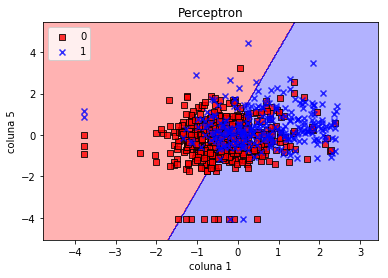

/home/johnny/Documentos/Aprendizado de Máquina/Aprendizado de Máquina -Aula/mylibs/Neural.py:147: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(self.activation(self.net_input(X)) >= 0.0, 1, 0)


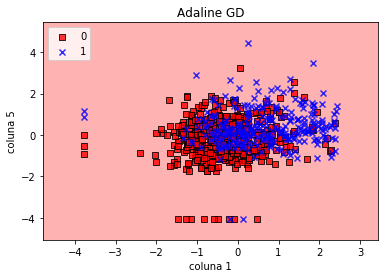

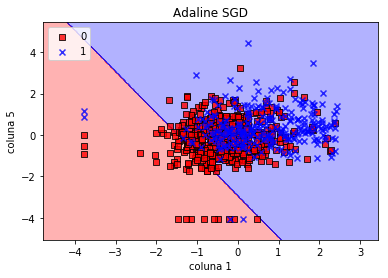

In [7]:
plot_decision_regions(XX,y,perc)
plt.xlabel('coluna 1')
plt.ylabel('coluna 5')
plt.legend(loc='upper left')
plt.title("Perceptron")
plt.show()


plot_decision_regions(XX,y,ada)
plt.xlabel('coluna 1')
plt.ylabel('coluna 5')
plt.legend(loc='upper left')
plt.title("Adaline GD")
plt.show()

plot_decision_regions(XX,y,adaS)
plt.xlabel('coluna 1')
plt.ylabel('coluna 5')
plt.legend(loc='upper left')
plt.title("Adaline SGD")
plt.show()


In [8]:
fold =  model_selection.StratifiedKFold()
mediaKNN = 0
mediaSVM = 0
mediaLR = 0
mediaNB = 0
mediaPerc = 0
mediaAda = 0
mediaAdaS = 0
for train,test in fold.split(X,y):
    
    
    Stand = preprocessing.StandardScaler()
    Stand.fit(X[train])
    X_train = Stand.transform(X[train])
    X_test =  Stand.transform(X[test])
    
    
    modelK = neighbors.KNeighborsClassifier()
    modelSVM = svm.SVC()
    modelLR = linear_model.LogisticRegression()
    modelNB = naive_bayes.GaussianNB()
    modelPerc = Neural.Perceptron(eta=0.0001,n_iter=1000)
    modelAda = Neural.AdalineGD(eta=0.001,n_iter=2000)
    modelAdaS = Neural.AdalineSGD(eta=0.001,n_iter=2000)
    
    
    modelK.fit(X_train,y[train])
    modelSVM.fit(X_train,y[train])
    modelLR.fit(X_train,y[train])
    modelNB.fit(X_train,y[train])
    modelPerc.fit(X_train,y[train])
    modelAda.fit(X_train,y[train])
    modelAdaS.fit(X_train,y[train])
    
    
    y_predK = modelK.predict(X_test)
    y_predSVM = modelSVM.predict(X_test)
    y_predLR = modelLR.predict(X_test)
    y_predNB = modelNB.predict(X_test)
    y_predPerc = modelPerc.predict(X_test)
    y_predAda = modelAda.predict(X_test)
    y_predAdaS = modelAdaS.predict(X_test)
    
    
    accK = metrics.accuracy_score(y[test],y_predK)
    mediaKNN = mediaKNN + accK
    accSVM = metrics.accuracy_score(y[test],y_predSVM)
    mediaSVM =mediaSVM+ accSVM
    accLR = metrics.accuracy_score(y[test],y_predLR)
    mediaLR =mediaLR+ accLR
    accNB = metrics.accuracy_score(y[test],y_predNB)
    mediaNB =mediaNB+ accNB
    accPerc = metrics.accuracy_score(y[test],y_predPerc)
    mediaPerc = mediaPerc+ accPerc
    accAda = metrics.accuracy_score(y[test],y_predAda)
    mediaAda = mediaAda+ accAda
    accAdaS = metrics.accuracy_score(y[test],y_predAdaS)
    mediaAdaS = mediaAdaS+ accAdaS
    
    print("KNN",accK)
    print("SVM",accSVM)
    print("LR",accLR)
    print("NB",accNB)
    print("Perceptron",accPerc)
    print("Adaline ",accAda)
    print("Adaline S",accAdaS)
    print()
mediaKNN = mediaKNN/3
mediaSVM = mediaSVM/3
mediaLR = mediaLR/3
mediaNB = mediaNB/3
mediaPerc = mediaPerc/3
mediaAda = mediaAda/3
mediaAdaS = mediaAdaS/3

print("Media KNN",mediaKNN)
print("Media SVM",mediaSVM)
print("Media LR",mediaLR)
print("Media NB",mediaNB)
print("Media Perceptron",mediaPerc)
print("Media Adaline",mediaAda)
print("Media Adaline S",mediaAdaS)

KNN 0.7276264591439688
SVM 0.7509727626459144
LR 0.7704280155642024
NB 0.7392996108949417
Perceptron 0.7003891050583657
Adaline  0.47470817120622566
Adaline S 0.4708171206225681

KNN 0.71875
SVM 0.7578125
LR 0.7421875
NB 0.7109375
Perceptron 0.73828125
Adaline  0.421875
Adaline S 0.421875

KNN 0.7333333333333333
SVM 0.8
LR 0.8
NB 0.7803921568627451
Perceptron 0.6862745098039216
Adaline  0.37254901960784315
Adaline S 0.37254901960784315

Media KNN 0.7265699308257675
Media SVM 0.769595087548638
Media LR 0.7708718385214007
Media NB 0.7435430892525622
Media Perceptron 0.7083149549540958
Media Adaline 0.42304406360468966
Media Adaline S 0.42174704674347047


## A diferença do Adaline Gradient Descent para o Adaline Stochastic Gradient Descent é que no primeiro os dados são analisados da mesma maneira por varias épocas, já no segundo os dados são modificados de posição (Shuffle nos dados) no momento de análise e modificação dos pesos.